#### Setup

In [54]:
import pandas as pd
# import numpy as np

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

# from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from collections import Counter

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [55]:
url = 'https://raw.githubusercontent.com/sai-byui/spring22/main/week02/AI%20Society%20Survey.csv'
data = pd.read_csv(url)
data.drop(columns=['Timestamp'], inplace=True)

# Drop nan's (b/c we don't like those)
data.dropna(inplace=True)

#### Clean Up

In [56]:
data.columns = ["height", "age", "gender", "shoe_size", "dress", "twilight", "horse_duck", "office"]

le = LabelEncoder()

gender = pd.get_dummies(data['gender'])
dress = pd.get_dummies(data['dress'])
twilight = pd.get_dummies(data['twilight'])
horse_duck = pd.get_dummies(data['horse_duck'])
office = pd.get_dummies(data['office'])

data = pd.concat([data, dress, twilight, horse_duck, office], axis=1)
data.drop(columns=['dress', 'twilight', 'horse_duck', 'office'], inplace=True)

data['gender'] = le.fit_transform(data['gender'])

In [57]:
data.gender.value_counts()

1    40
0    16
Name: gender, dtype: int64

,height,age,gender,shoe_size,Blue and Black,Gold and White,Edward. (Hot vampire. Need I say more),Jacob. (Dreamy werewolf... duh),Duck-sized horse,Horse-sized duck,Kevin Malone,Pam and Jim
0,62.0,20.0,1,7.5,1,0,1,0,0,1,1,0
1,70.0,24.0,1,11.0,0,1,1,0,1,0,1,0
2,73.0,23.0,1,12.0,1,0,0,1,1,0,1,0
3,72.0,26.0,1,11.5,1,0,0,1,1,0,1,0
4,65.0,22.0,1,10.0,0,1,0,1,1,0,1,0
5,62.0,22.0,0,6.5,0,1,1,0,1,0,0,1
6,71.0,23.0,1,11.0,1,0,1,0,1,0,0,1
7,70.0,23.0,1,10.5,1,0,1,0,1,0,1,0
8,74.0,25.0,1,11.0,0,1,1,0,1,0,0,1
10,71.0,23.0,1,10.5,0,1,1,0,1,0,0,1


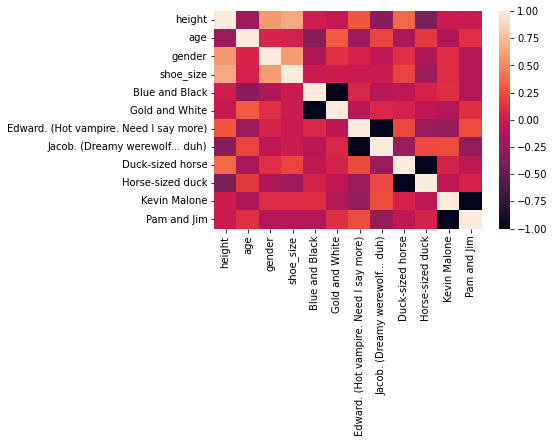

In [58]:
# Check out our feature correlations
import seaborn as sns
sns.heatmap(data.corr())
data.head(10)

#### Split

In [59]:
X = data.drop(columns=['gender'])
y = data['gender']

X, X_dev, y, y_dev = train_test_split(X, y, random_state=42, train_size= .8)
X, X_test, y, y_test = train_test_split(X, y, random_state=42, train_size= .8)
print(len(X), len(X_dev), len(X_test))

35 12 9


#### Model

In [60]:
model = XGBClassifier()
model.fit(X, y)

y_hat = model.predict(X_dev)
y_holdout = model.predict(X_test)

#### Result

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.83      0.62      0.71         8

    accuracy                           0.67        12
   macro avg       0.67      0.69      0.66        12
weighted avg       0.72      0.67      0.68        12



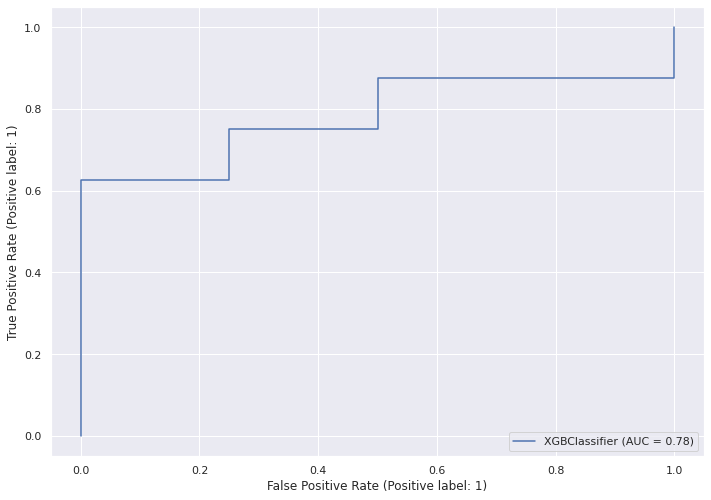

In [65]:
plot_roc_curve(model, X_dev, y_dev)
print(classification_report(y_dev, y_hat));

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



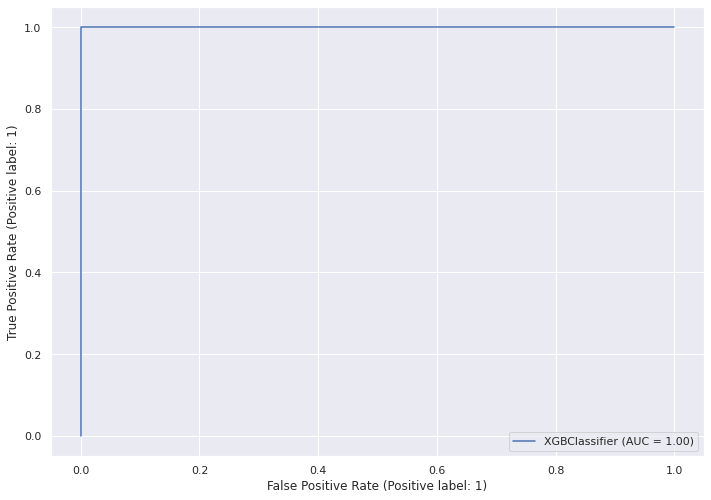

In [64]:
plot_roc_curve(model, X_test, y_test)
print(classification_report(y_test, y_holdout));

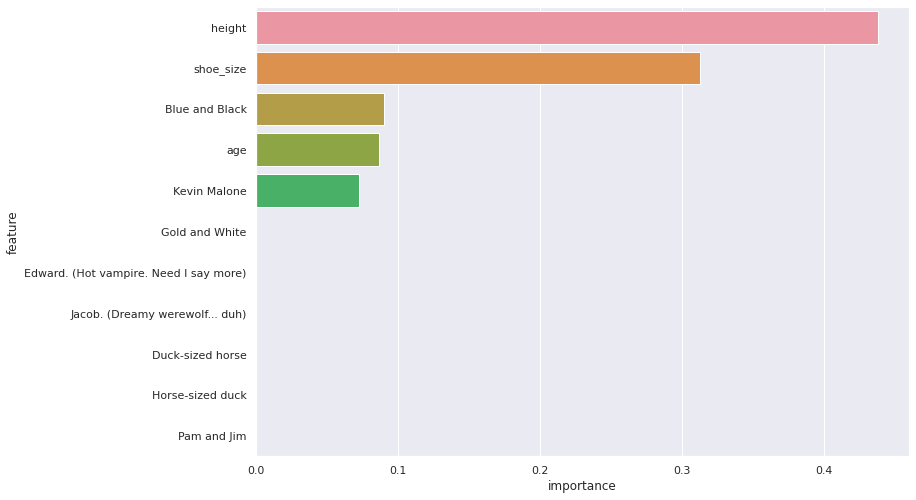

In [63]:
import seaborn as sns

importance = model.feature_importances_

df = pd.DataFrame(list(zip(importance, X.columns.to_list())),
                  columns=['importance', 'feature'])

df = df.sort_values(by='importance', ascending=False)
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(data=df, x='importance', y='feature');